In [262]:

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sys   
from numpy import arange
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import KFold
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import patsy
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from numpy import mean



%matplotlib inline 

In [263]:
file = 'C:/Users/Ghaida/Desktop/SDAIA/car.csv'
df = pd.read_csv(file)

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [264]:
df.shape

(4345, 9)

In [265]:
df.Brand.value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [266]:
df.Body.value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [268]:
df.isnull().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [269]:
df["Price"].median()  

11500.0

In [270]:
df["EngineV"].median()  

2.2

In [271]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [272]:
# in price and EngineV I have null values 
# the price is my target 

df.dropna(subset=['Price'], inplace=True)


# median2 = df["EngineV"].median()  
# df["EngineV"].fillna(median2, inplace=True)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4173 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4173 non-null   object 
 3   Mileage       4173 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4173 non-null   object 
 6   Registration  4173 non-null   object 
 7   Year          4173 non-null   int64  
 8   Model         4173 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 326.0+ KB


In [274]:
df.isnull().sum()


Brand             0
Price             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [275]:
#check if I have any duplicated rows
df.duplicated().sum()


50

In [276]:
#showing the duplicated rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
348,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
602,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
1160,BMW,47000.0,other,5,2.00,Petrol,yes,2014,Z4
1573,Volkswagen,24900.0,sedan,1,1.60,Diesel,yes,2016,Jetta
1929,BMW,75555.0,sedan,30,4.40,Petrol,yes,2014,550
1943,Mercedes-Benz,20400.0,sedan,190,1.80,Gas,yes,2011,E-Class
2008,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
2037,Mitsubishi,15900.0,crossover,180,3.00,Gas,yes,2008,Pajero Wagon
2044,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
2380,Audi,39999.0,crossover,45,2.00,Diesel,yes,2014,Q5


In [277]:
#drop duplicates
df = df.drop_duplicates()

In [278]:
#reset index
df = df.reset_index(drop=True)

In [279]:
#check again
df.duplicated().sum()

0

In [280]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

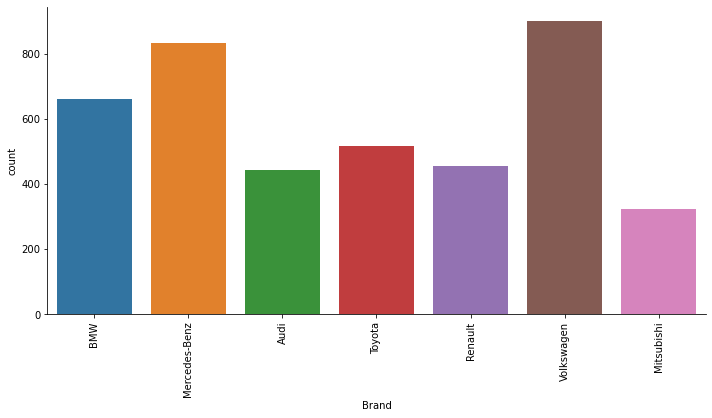

In [281]:
var = "Brand"
plt.figure(figsize=(10, 10))
sns.catplot(x=var, kind="count",  aspect=2, data=df);
plt.xticks(rotation=90);

C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

<AxesSubplot:xlabel='Body', ylabel='Price'>

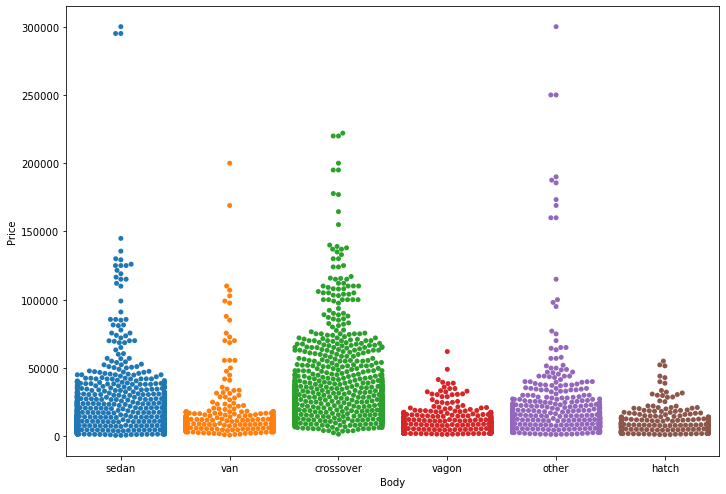

In [282]:
var = 'Body' 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = df)

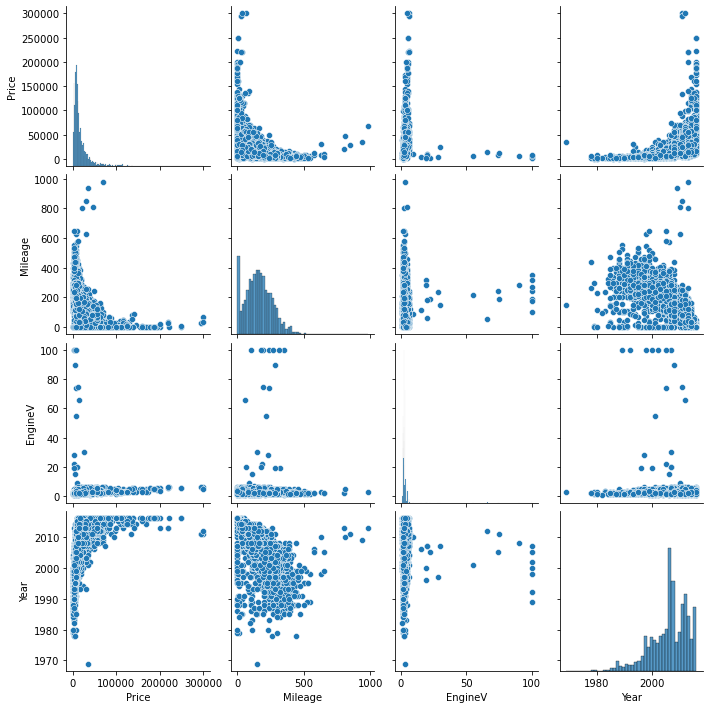

In [283]:
sns.pairplot(df)
plt.show()

In [284]:
dummy_brand = pd.get_dummies(df['Brand'])
print(dummy_brand)

      Audi  BMW  Mercedes-Benz  Mitsubishi  Renault  Toyota  Volkswagen
0        0    1              0           0        0       0           0
1        0    0              1           0        0       0           0
2        0    0              1           0        0       0           0
3        1    0              0           0        0       0           0
4        0    0              0           0        0       1           0
...    ...  ...            ...         ...      ...     ...         ...
4118     0    0              1           0        0       0           0
4119     0    1              0           0        0       0           0
4120     0    1              0           0        0       0           0
4121     0    0              0           0        0       1           0
4122     0    0              0           0        0       0           1

[4123 rows x 7 columns]


In [285]:
# merge 
df = df.join(dummy_brand)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,1,0,0,0,0,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,0,1,0,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,0,1,0,0,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,1,0,0,0,0,0,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,0,0,1,0,0,0,0
4119,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,0,1,0,0,0,0,0
4120,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,0,1,0,0,0,0,0
4121,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla,0,0,0,0,0,1,0


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4123 non-null   object 
 1   Price          4123 non-null   float64
 2   Body           4123 non-null   object 
 3   Mileage        4123 non-null   int64  
 4   EngineV        3975 non-null   float64
 5   Engine Type    4123 non-null   object 
 6   Registration   4123 non-null   object 
 7   Year           4123 non-null   int64  
 8   Model          4123 non-null   object 
 9   Audi           4123 non-null   uint8  
 10  BMW            4123 non-null   uint8  
 11  Mercedes-Benz  4123 non-null   uint8  
 12  Mitsubishi     4123 non-null   uint8  
 13  Renault        4123 non-null   uint8  
 14  Toyota         4123 non-null   uint8  
 15  Volkswagen     4123 non-null   uint8  
dtypes: float64(2), int64(2), object(5), uint8(7)
memory usage: 318.2+ KB


In [287]:
dummy_eng_type = pd.get_dummies(df['Engine Type'])
print(dummy_eng_type)

      Diesel  Gas  Other  Petrol
0          0    0      0       1
1          1    0      0       0
2          0    1      0       0
3          0    0      0       1
4          0    0      0       1
...      ...  ...    ...     ...
4118       1    0      0       0
4119       0    0      0       1
4120       0    0      0       1
4121       0    0      0       1
4122       1    0      0       0

[4123 rows x 4 columns]


In [288]:
# merge 
df = df.join(dummy_eng_type)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,Diesel,Gas,Other,Petrol
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,1,0,0,0,0,0,0,0,0,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,0,1,0,0,0,0,1,0,0,0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,0,1,0,0,0,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,1,0,0,0,0,0,0,0,0,0,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,0,0,1,0,0,0,0,1,0,0,0
4119,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,0,1,0,0,0,0,0,0,0,0,1
4120,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,0,1,0,0,0,0,0,0,0,0,1
4121,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla,0,0,0,0,0,1,0,0,0,0,1


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4123 non-null   object 
 1   Price          4123 non-null   float64
 2   Body           4123 non-null   object 
 3   Mileage        4123 non-null   int64  
 4   EngineV        3975 non-null   float64
 5   Engine Type    4123 non-null   object 
 6   Registration   4123 non-null   object 
 7   Year           4123 non-null   int64  
 8   Model          4123 non-null   object 
 9   Audi           4123 non-null   uint8  
 10  BMW            4123 non-null   uint8  
 11  Mercedes-Benz  4123 non-null   uint8  
 12  Mitsubishi     4123 non-null   uint8  
 13  Renault        4123 non-null   uint8  
 14  Toyota         4123 non-null   uint8  
 15  Volkswagen     4123 non-null   uint8  
 16  Diesel         4123 non-null   uint8  
 17  Gas            4123 non-null   uint8  
 18  Other   

In [290]:
dummy_body_type = pd.get_dummies(df['Body'])
print(dummy_body_type)

      crossover  hatch  other  sedan  vagon  van
0             0      0      0      1      0    0
1             0      0      0      0      0    1
2             0      0      0      1      0    0
3             1      0      0      0      0    0
4             1      0      0      0      0    0
...         ...    ...    ...    ...    ...  ...
4118          0      0      0      1      0    0
4119          0      0      0      1      0    0
4120          0      0      0      1      0    0
4121          0      0      0      1      0    0
4122          0      0      0      0      0    1

[4123 rows x 6 columns]


In [291]:
df = df.join(dummy_body_type)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Audi,...,Diesel,Gas,Other,Petrol,crossover,hatch,other,sedan,vagon,van
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,0,...,0,0,0,1,0,0,0,1,0,0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,0,...,1,0,0,0,0,0,0,0,0,1
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,0,...,0,1,0,0,0,0,0,1,0,0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,1,...,0,0,0,1,1,0,0,0,0,0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,0,...,1,0,0,0,0,0,0,1,0,0
4119,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,0,...,0,0,0,1,0,0,0,1,0,0
4120,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,0,...,0,0,0,1,0,0,0,1,0,0
4121,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla,0,...,0,0,0,1,0,0,0,1,0,0


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4123 non-null   object 
 1   Price          4123 non-null   float64
 2   Body           4123 non-null   object 
 3   Mileage        4123 non-null   int64  
 4   EngineV        3975 non-null   float64
 5   Engine Type    4123 non-null   object 
 6   Registration   4123 non-null   object 
 7   Year           4123 non-null   int64  
 8   Model          4123 non-null   object 
 9   Audi           4123 non-null   uint8  
 10  BMW            4123 non-null   uint8  
 11  Mercedes-Benz  4123 non-null   uint8  
 12  Mitsubishi     4123 non-null   uint8  
 13  Renault        4123 non-null   uint8  
 14  Toyota         4123 non-null   uint8  
 15  Volkswagen     4123 non-null   uint8  
 16  Diesel         4123 non-null   uint8  
 17  Gas            4123 non-null   uint8  
 18  Other   

In [293]:
df.drop(df.columns[[0,2,5,6,8]], axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          4123 non-null   float64
 1   Mileage        4123 non-null   int64  
 2   EngineV        3975 non-null   float64
 3   Year           4123 non-null   int64  
 4   Audi           4123 non-null   uint8  
 5   BMW            4123 non-null   uint8  
 6   Mercedes-Benz  4123 non-null   uint8  
 7   Mitsubishi     4123 non-null   uint8  
 8   Renault        4123 non-null   uint8  
 9   Toyota         4123 non-null   uint8  
 10  Volkswagen     4123 non-null   uint8  
 11  Diesel         4123 non-null   uint8  
 12  Gas            4123 non-null   uint8  
 13  Other          4123 non-null   uint8  
 14  Petrol         4123 non-null   uint8  
 15  crossover      4123 non-null   uint8  
 16  hatch          4123 non-null   uint8  
 17  other          4123 non-null   uint8  
 18  sedan   

In [294]:
df

,Price,Mileage,EngineV,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,...,Diesel,Gas,Other,Petrol,crossover,hatch,other,sedan,vagon,van
0,4200.0,277,2.0,1991,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7900.0,427,2.9,1999,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,13300.0,358,5.0,2003,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,23000.0,240,4.2,2007,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,125000.0,9,3.0,2014,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4119,6500.0,1,3.5,1999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4120,8000.0,194,2.0,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4121,14200.0,31,NaN,2014,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          4123 non-null   float64
 1   Mileage        4123 non-null   int64  
 2   EngineV        3975 non-null   float64
 3   Year           4123 non-null   int64  
 4   Audi           4123 non-null   uint8  
 5   BMW            4123 non-null   uint8  
 6   Mercedes-Benz  4123 non-null   uint8  
 7   Mitsubishi     4123 non-null   uint8  
 8   Renault        4123 non-null   uint8  
 9   Toyota         4123 non-null   uint8  
 10  Volkswagen     4123 non-null   uint8  
 11  Diesel         4123 non-null   uint8  
 12  Gas            4123 non-null   uint8  
 13  Other          4123 non-null   uint8  
 14  Petrol         4123 non-null   uint8  
 15  crossover      4123 non-null   uint8  
 16  hatch          4123 non-null   uint8  
 17  other          4123 non-null   uint8  
 18  sedan   

In [296]:
df['Year'].max()

2016

In [297]:
df['Year'].min()

1969

In [298]:
df.isnull().sum()

Price              0
Mileage            0
EngineV          148
Year               0
Audi               0
BMW                0
Mercedes-Benz      0
Mitsubishi         0
Renault            0
Toyota             0
Volkswagen         0
Diesel             0
Gas                0
Other              0
Petrol             0
crossover          0
hatch              0
other              0
sedan              0
vagon              0
van                0
dtype: int64

In [299]:
corr_matrix = df.corr()

In [300]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Year             0.483779
crossover        0.355243
Mercedes-Benz    0.219513
BMW              0.069918
Petrol           0.065456
EngineV          0.056607
other            0.045553
Toyota           0.044901
Diesel           0.024368
Audi            -0.006970
Other           -0.019045
Mitsubishi      -0.090025
hatch           -0.096338
Gas             -0.113768
sedan           -0.114321
van             -0.115149
vagon           -0.117365
Volkswagen      -0.130050
Renault         -0.155078
Mileage         -0.458386
Name: Price, dtype: float64

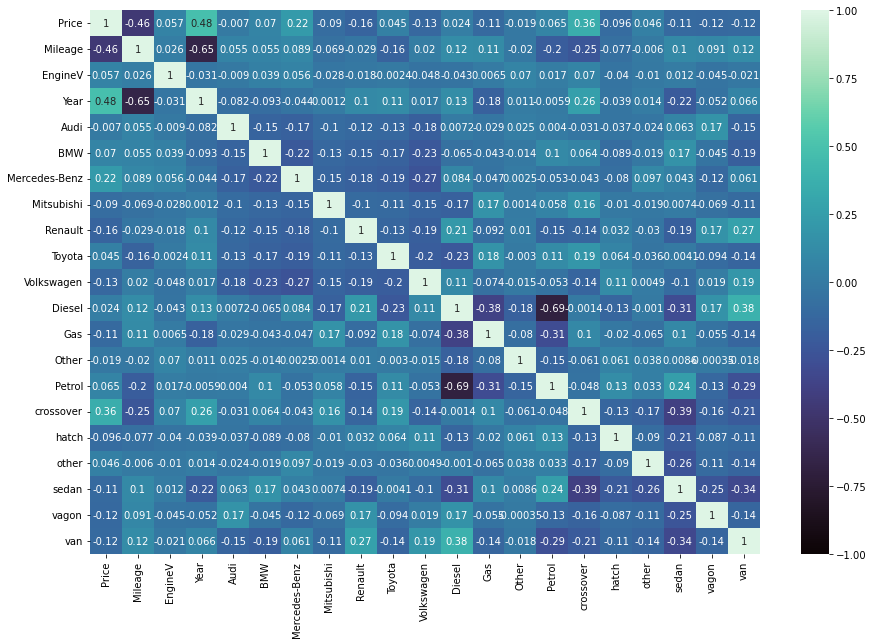

In [301]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix ,cmap='mako', annot=True, vmin=-1, vmax=1);

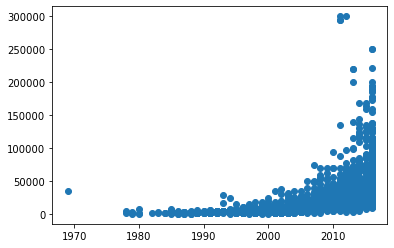

In [302]:
plt.scatter(df['Year'], df['Price'])
plt.show()

In [303]:
df.columns

Index(['Price', 'Mileage', 'EngineV', 'Year', 'Audi', 'BMW', 'Mercedes-Benz',
       'Mitsubishi', 'Renault', 'Toyota', 'Volkswagen', 'Diesel', 'Gas',
       'Other', 'Petrol', 'crossover', 'hatch', 'other', 'sedan', 'vagon',
       'van'],
      dtype='object')

In [304]:
# sns.pairplot(df['Year' , 'Price'], plot_kws=dict());

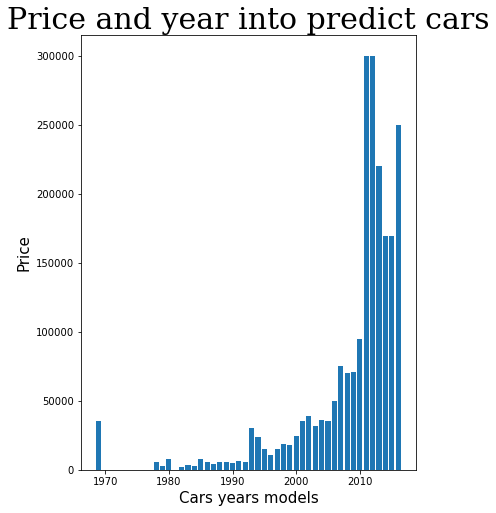

In [305]:
plt.figure(figsize=(6,8))
plt.bar(df['Year'], df['Price'])
plt.ylabel('Price', fontsize = 15)
plt.xlabel('Cars years models', fontsize = 15)
plt.title('Price and year into predict cars', fontsize = 30,family = 'serif');

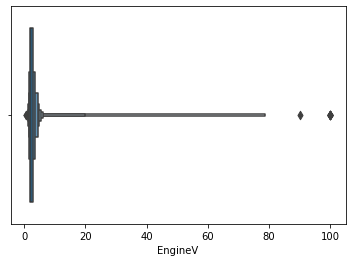

In [306]:
# for showing the outlaiers 

bx = sns.boxenplot(x="EngineV", data=df)

<Figure size 432x576 with 0 Axes>

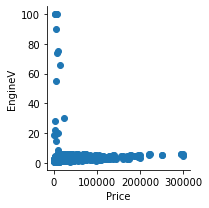

In [307]:
plt.figure(figsize=(6,8))
graph = sns.FacetGrid(df)
graph.map(plt.scatter, 'Price','EngineV' )
plt.show()

In [308]:
df.sample(8)

,Price,Mileage,EngineV,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,...,Diesel,Gas,Other,Petrol,crossover,hatch,other,sedan,vagon,van
1221,20500.0,105,2.5,2013,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1196,7000.0,286,2.8,2001,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2389,35000.0,135,5.5,2008,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
761,37500.0,45,2.0,2013,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3731,6555.0,180,1.5,2005,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3151,9500.0,90,1.6,2008,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3517,1850.0,250,2.5,1999,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1452,22600.0,165,3.0,2007,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [309]:
X = df.drop(['Price'],axis=1)
Y = df['Price']

In [310]:
# indepndnt features 
X

,Mileage,EngineV,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,Diesel,Gas,Other,Petrol,crossover,hatch,other,sedan,vagon,van
0,277,2.0,1991,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,427,2.9,1999,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,358,5.0,2003,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,240,4.2,2007,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,120,2.0,2011,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,9,3.0,2014,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4119,1,3.5,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4120,194,2.0,1985,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4121,31,NaN,2014,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [311]:
# dependnt feature (Target)
Y

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4118    125000.0
4119      6500.0
4120      8000.0
4121     14200.0
4122     13500.0
Name: Price, Length: 4123, dtype: float64

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          4123 non-null   float64
 1   Mileage        4123 non-null   int64  
 2   EngineV        3975 non-null   float64
 3   Year           4123 non-null   int64  
 4   Audi           4123 non-null   uint8  
 5   BMW            4123 non-null   uint8  
 6   Mercedes-Benz  4123 non-null   uint8  
 7   Mitsubishi     4123 non-null   uint8  
 8   Renault        4123 non-null   uint8  
 9   Toyota         4123 non-null   uint8  
 10  Volkswagen     4123 non-null   uint8  
 11  Diesel         4123 non-null   uint8  
 12  Gas            4123 non-null   uint8  
 13  Other          4123 non-null   uint8  
 14  Petrol         4123 non-null   uint8  
 15  crossover      4123 non-null   uint8  
 16  hatch          4123 non-null   uint8  
 17  other          4123 non-null   uint8  
 18  sedan   

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [314]:
X_train['EngineV'].median()

2.2

In [315]:
#fill nulls using fit and transform
med = SimpleImputer(strategy="median")
med.fit(X_train)
X_train = med.transform(X_train)

# scalling data to improve the model performance 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [316]:
#fill nulls using fit and transform
med = SimpleImputer(strategy="median")
med.fit(X_test)
X_test = med.transform(X_test)

# scalling data to improve the model performance 
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [317]:
print(len(X_test))

825


# CV

In [318]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

# Linear Regg

In [319]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression(normalize=True)

cross_val_score(lm, X_train, Y_train, cv=kf,scoring='r2').max()

0.5232613612175683

In [320]:
# plt.scatter(Y_train, v1)
# plt.xlabel("y_train")
# plt.ylabel("v1")
# plt.title(" Actual Prices vs Predicted Prices")
# plt.show()

# Lasso

In [321]:
lass_reg_model = Lasso()

In [322]:
lass_reg_model.fit(X_train,Y_train)

C:\Users\Ghaida\anaconda3400\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14352925801.03064, tolerance: 200326320.41668725
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [323]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [324]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.43475278578453525


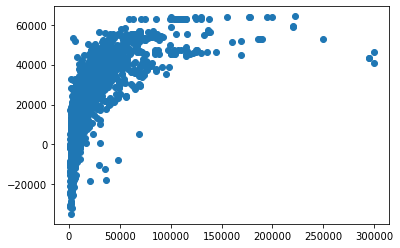

In [325]:
plt.scatter(Y_train, training_data_prediction)
plt.show()

In [326]:
from sklearn.model_selection import cross_val_score
ls = Lasso()

cross_val_score(ls, X_train, Y_train, cv=5,scoring='r2')

C:\Users\Ghaida\anaconda3400\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12682324026.045044, tolerance: 171765320.3770396
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ghaida\anaconda3400\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12316898021.235474, tolerance: 159705540.32580438
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ghaida\anaconda3400\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6222920839.174438, tolerance: 136855253.74459887
  model = cd_fast.enet_coordinate_descent(


array([0.52425641, 0.46671553, 0.4526718 , 0.42878216, 0.34696128])

# with poly and Ridge 

In [327]:
from sklearn.model_selection import cross_val_score

ML = LinearRegression()
poly = PolynomialFeatures(degree=2)

poly_train = poly.fit_transform(X_train)
v1 = cross_val_score(ML, poly_train, Y_train, cv=9,scoring='r2')
v1.max()

0.7094367967245523

In [334]:
#Poly and Ridge without predict  : 

from sklearn.linear_model import Ridge
ri =  Ridge(alpha=950)
ri.fit(poly_train, Y_train)
print(ri.score(poly_train, Y_train))
poly_test = poly.transform(X_test)
pred = ri.predict(poly_test)
score = ri.score(poly_test, Y_test)
print(score)

0.6335885952147435
0.6229417648058131


In [335]:
print('Mean MAE: %.3f ' % (mean(score)))

Mean MAE: 0.623 


Text(0.5, 1.0, 'Ridge Coefficients vs Regularization Parameters')

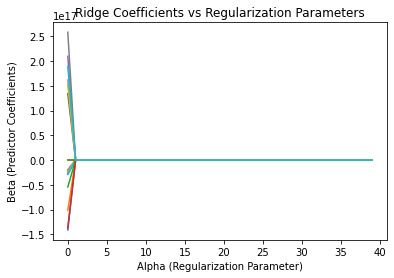

In [336]:
###initialize list to store coefficient values
coef=[]
alphas = range(0,40)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X_train,Y_train)
  coef.append(ridgereg.coef_)

###Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')

C:\Users\Ghaida\anaconda3400\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


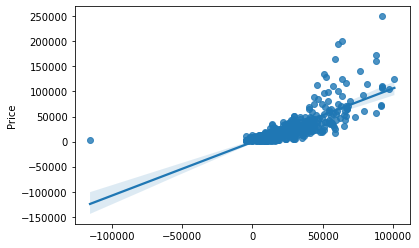

In [233]:
sns.regplot(pred,Y_test);

In [150]:
tr= ri.score(poly_train, Y_train)

In [151]:
tr2=ri.score(poly_test, Y_test)

In [152]:
X_test.shape

(825, 20)

In [153]:
Y_test.shape

(825,)

In [154]:
X_train.shape

(3298, 20)

In [155]:
Y_train.shape

(3298,)

In [156]:
#Poly and Ridge with predict  : 

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 950, normalize = False)
ridge.fit(X_train,Y_train)
print(ridge.score(X_train,Y_train))
ridge_predict = ridge.predict(X_test)
print(ridge.score(X_test,Y_test))

0.4227485834389014
0.45106118419851926


# Ridge


In [157]:
#define cross-validation method to evaluate model
c_v = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [158]:
#define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=c_v, scoring='neg_mean_absolute_error')


In [159]:
#fit model
model.fit(X_train, Y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [160]:
#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [161]:
from sklearn.model_selection import cross_val_score
rs = Ridge()

cross_val_score(rs, X_train, Y_train, cv=5,scoring='r2')

array([0.52427362, 0.46675537, 0.45265671, 0.42877597, 0.34695881])

# RandomForestClassifier

In [162]:
from sklearn.ensemble import RandomForestRegressor 

  

 # create regressor object 

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

  
# fit the regressor with x and y data 
regressor.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [164]:
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
cross_val_score(regressor, X_train, Y_train, cv=5 ,scoring='r2').max()

0.9087245370441188

# RandomForestRegressor

In [165]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

train_pred = rf_reg.predict(X_train)
train_pred


array([32575.32142857, 12570.077     , 38210.05      , ...,
       10692.28805   ,  3774.716     , 14203.47033333])

In [166]:
from sklearn.model_selection import cross_val_score
rf_reg = RandomForestRegressor(n_estimators=100)
cross_val_score(rf_reg, X_train, Y_train, cv=5 ,scoring='r2').max()

0.9116119718335245

# OLS

In [167]:
X = X_train
y = Y_train
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.275
Model:                            OLS   Adj. R-squared (uncentered):              0.271
Method:                 Least Squares   F-statistic:                              73.09
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                   9.41e-214
Time:                        22:08:36   Log-Likelihood:                         -38258.
No. Observations:                3298   AIC:                                  7.655e+04
Df Residuals:                    3281   BIC:                                  7.665e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5825.4051    646.354     -9.013      0.000   -7092.703   -4558.107
x2           888.1917    465.172      1.909      0.056     -23.866    1800.249
x3          7661.8399    648.903     11.807      0.000    6389.544    8934.136
x4          1049.4193    423.366      2.479      0.013     219.331    1879.507
x5          1927.9794    405.870      4.750      0.000    1132.196    2723.763
x6          5107.6319    382.934     13.338      0.000    4356.818    5858.445
x7         -3088.6612    438.338     -7.046      0.000   -3948.106   -2229.217
x8         -3245.1444    447.197     -7.257      0.000   -4121.958   -2368.331
x9         -1762.3197    428.907     -4.109      0.000   -2603.272    -921.367
x10        -1598.6238    384.868     -4.154      0.000   -2353.229    -844.018
x11           92.6929    345.424      0.268      0.788    -584.576     769.962
x12         -437.0784    398.988     -1.095      0.273   -1219.369     345.212
x13         -440.9071    438.302     -1.006      0.315   -1300.280     418.465
x14          403.5651    328.040      1.230      0.219    -239.618    1046.748
x15         4448.9378    409.972     10.852      0.000    3645.111    5252.764
x16        -1371.5851    437.762     -3.133      0.002   -2229.900    -513.270
x17          103.8969    409.188      0.254      0.800    -698.392     906.186
x18        -1197.3996    353.074     -3.391      0.001   -1889.668    -505.131
x19        -1059.2885    434.898     -2.436      0.015   -1911.988    -206.589
x20        -1563.9946    448.703     -3.486      0.000   -2443.761    -684.228
==============================================================================
Omnibus:                     3765.508   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488489.174
Skew:                           5.772   Prob(JB):                         0.00
Kurtosis:                      61.494   Cond. No.                     8.43e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# SVM

In [168]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, Y_train)

train_pred = svm_reg.predict(X_train)
train_pred


array([32996.34847445, 11899.9277342 , 36820.0266634 , ...,
       10700.15298463,  3699.51155473, 12005.92206468])

In [169]:
from sklearn.model_selection import cross_val_score
svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
cross_val_score(svm_reg, X_train, Y_train, cv=5 ,scoring='r2')

array([0.85434736, 0.81401419, 0.86524554, 0.77183583, 0.66525899])

# RANSA regisstor

In [170]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)


train_pred

array([23425.32905429, 14426.22677953, 19161.32905429, ...,
       19257.32905429, -1702.67094571, 13225.32905429])

In [171]:
from sklearn.model_selection import cross_val_score
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
cross_val_score(model, X_train, Y_train, cv=5 ,scoring='r2')

array([-0.31053963, -1.51428234, -1.05511196, -0.13613327,  0.10200958])

# Elstic

In [172]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)

train_pred

array([ 45550.9639259 ,  29506.23098607,  45575.0437366 , ...,
        21700.3626649 , -16675.772355  ,  24371.52987536])

In [173]:
from sklearn.model_selection import cross_val_score
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
cross_val_score(model, X_train, Y_train, cv=5 ,scoring='r2')

array([0.52497006, 0.46883456, 0.45232199, 0.42860364, 0.34644052])

# Testing 

In [187]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print(Y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print(Y_train, train_pred)

Test set evaluation:
_____________________________________
2450     10250.0
1404      1500.0
3733     21500.0
2658      6950.0
1489    125000.0
          ...   
446      16500.0
762      19700.0
851       8999.0
1966     68500.0
2929      6900.0
Name: Price, Length: 825, dtype: float64 [ 10578.516        3556.0115      21353.754        8040.2657
 126621.72966667  11366.648       58341.24206741   2970.64
  15627.17845     27802.58569048   4117.96241667   7137.42485
   9677.36666667   6213.436       78578.628       23536.41665
  46731.668       16416.611       18733.359       13383.667
  10657.26547619  35343.443       29961.2717       8695.57933333
   8543.495        4308.622        4399.5611      71153.936
   3949.567        8063.02433333  13558.53738758  27613.225
   4712.453        4505.832       11856.338       27536.442
   4055.613       14775.676       22315.57        10746.77866667
   4658.864       10413.867       11907.86        33764.092
  36164.74         8635.782        3321

In [174]:
from sklearn.ensemble import RandomForestRegressor
 

In [175]:
rf = RandomForestRegressor(n_estimators=1000)

In [184]:
rfModel = rf.fit(X_train,Y_train)
rfModel

RandomForestRegressor(n_estimators=1000)

In [186]:
y_pred_r = rfModel.predict(X_test)


In [178]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [179]:
mean_ab_error = mean_absolute_error(Y_test , y_pred_r)
mean_ab_error

4136.237011371924

In [180]:
mean_sq = mean_squared_error(Y_test , y_pred_r)
mean_sq

115726211.510362

In [181]:
score_r = r2_score(Y_test , y_pred_r)
score_r

0.8177930192033336

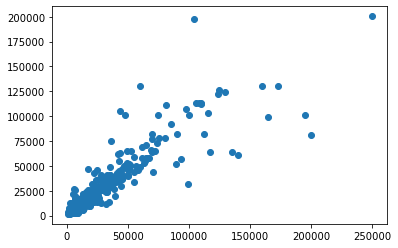

In [210]:
plt.scatter(Y_test , y_pred_r)
plt.show()



# Ridge Testing 

In [1279]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.0, normalize = False)
ridge.fit(X_train,Y_train)
print(ridge.score(X_train,Y_train))
ridge_predict = ridge.predict(X_test)
print('Ridge score: ',ridge.score(X_test,Y_test))

0.4346721081607743
Ridge score:  -9.194720661629978e+23
